In [9]:
import matplotlib.pyplot as plt
import numpy as np
import re


In [109]:
logs1 = [line.rstrip() for line in open('kerastweet-8-logs.txt')]
logs2 = [line.rstrip() for line in open('kerastweet-10-logs.txt')]
logs = logs1+logs2
Blog1 = [line.rstrip() for line in open('tweet-classification-8-logs.txt')]
Blog2 = [line.rstrip() for line in open('tweet-classification-9-logs.txt')]
Blogs = Blog1+Blog2

In [110]:
regex = r".acc: 0.([0-9]{4})"

regval = r".val_acc: 0.([0-9]{4})"

accuracies1 = []
accuracies2 = []
val_acc1 = []
val_acc2 = []

for i,l in enumerate(logs):
    matches = re.finditer(regex, l)
    valmatches = re.finditer(regval,l)
    for match in matches:
        accuracies1.append((i,match.group(1)))
    for match in valmatches:
        val_acc1.append((i,match.group(1)))
        
for i,l in enumerate(Blogs):
    matches = re.finditer(regex, l)
    valmatches = re.finditer(regval,l)
    for match in matches:
        accuracies2.append((i,match.group(1)))
    for match in valmatches:
        val_acc2.append((i,match.group(1)))
        



In [111]:
accuracies1X = [ind for ind,i in accuracies1]
val_acc1X = [ind for ind,i in val_acc1]

accuracies1Y = [float(i)/100 for ind,i in accuracies1]
val_acc1Y = [float(i)/100 for ind,i in val_acc1]

accuracies2X = [ind for ind,i in accuracies2]
val_acc2X = [ind for ind,i in val_acc2]

accuracies2Y = [float(i)/100 for ind,i in accuracies2]
val_acc2Y = [float(i)/100 for ind,i in val_acc2]



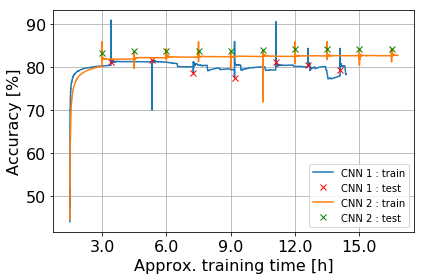

In [112]:
plt.figure()

Font = 16
subsample = 2


fig, ax = plt.subplots()

ax.plot(accuracies1X, accuracies1Y)
ax.plot(val_acc1X, val_acc1Y, 'x', color="r")

ax.plot(accuracies2X, accuracies2Y)
ax.plot(val_acc2X, val_acc2Y, 'x', color="g")

hours = np.arange(len(val_acc2X[::subsample]))*1.5*subsample+1.5*subsample

plt.yticks(np.arange(5,10)*10, fontsize=Font)
plt.xticks(val_acc2X[::subsample], hours, fontsize=Font)
plt.legend(["CNN 1 : train", "CNN 1 : test", "CNN 2 : train", "CNN 2 : test"])

ax.set_xlabel('Approx. training time [h]', fontsize=Font)
ax.set_ylabel('Accuracy [%]', fontsize=Font)

ax.grid(True)
plt.tight_layout()
plt.savefig('CNNaccuracy.eps', format='eps', dpi=1000)
plt.show()

In [74]:
print(accuraciesY[1:100])

[49.0, 50.67, 52.0, 47.6, 47.33, 48.86, 48.25, 48.0, 47.6, 47.82, 48.17, 48.62, 49.0, 49.6, 49.87, 50.24, 50.89, 51.79, 52.7, 52.57, 52.82, 53.04, 53.17, 53.76, 54.15, 54.52, 55.14, 55.24, 55.47, 55.94, 55.94, 55.7, 55.82, 55.94, 56.17, 56.32, 56.47, 56.77, 56.5, 56.54, 56.38, 56.56, 56.5, 56.62, 56.83, 56.89, 56.92, 57.31, 57.24, 56.98, 56.92, 57.21, 57.3, 57.31, 57.46, 57.4, 57.79, 58.07, 58.13, 58.2, 58.29, 58.44, 58.69, 58.83, 59.15, 59.22, 59.53, 59.65, 59.57, 59.63, 59.72, 60.0, 60.08, 60.16, 60.18, 60.21, 60.26, 60.43, 60.62, 60.69, 60.76, 60.77, 60.86, 60.85, 60.95, 60.97, 61.14, 61.15, 61.18, 61.23, 61.33, 61.51, 61.49, 61.43, 61.42, 61.48, 61.59, 61.76, 61.78]
